<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import RBmodel

from RBmodel import cell_models

from RBmodel.plot_utils import plot_phase_space

import numpy as np

import matplotlib.pyplot as plt

In [2]:
params = cell_models.DEFAULT_PARAMS

In [3]:
params['delta'] = .8
params['transition'] = 'size'
params['k_trans'] = 1000
params['alpha'] = .1
params['eta'] = 1.2


In [4]:
params

{'alpha': 0.1,
 'beta0': 0.09,
 'delta': 0.8,
 'gamma': 0.03,
 'epsilon': 0.2,
 'eta': 1.2,
 'dt': 0.1,
 'duration_SG2': 12,
 'transition_th': 1.0,
 'k_trans': 1000,
 'division': 'timer',
 'transition': 'size',
 'max_cycles': 100000.0}

In [5]:
T = int(1e5)

In [6]:
cell = cell_models.cell()

cell.grow(T)

In [7]:
phases = np.array(cell.phase_hist)

phases = (phases == "G1").astype(int)

In [8]:
dphases = phases[1:] - phases[:-1]

In [9]:
G1idx = np.where(dphases==1.)[0]

In [10]:
start, end = G1idx[-2]+1, G1idx[-1]-1

In [11]:
G2idx = np.where(dphases==-1.)[0]

In [12]:
G1S_trans = G2idx[((G2idx > start) & (G2idx < end))][0]

In [13]:
t = np.linspace(start-G1S_trans, end-G1S_trans, end-start)*params['dt']

In [16]:
SAVE_DIR = "/Users/shuyuan/Library/CloudStorage/OneDrive-Stanford/Skotheim lab/RB degradation paper/Figures"

In [17]:
import os

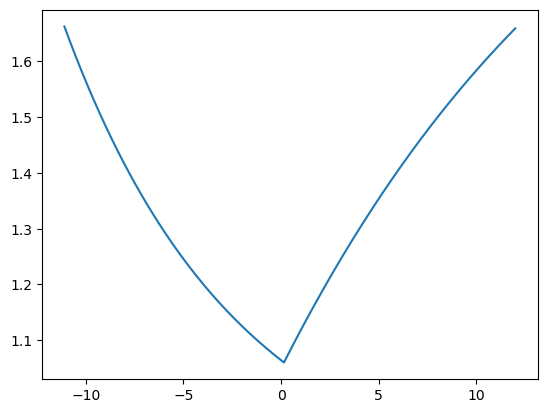

In [18]:
yvals = cell.RB_c_hist

plt.plot(t, yvals[start:end])

plt.savefig(
    os.path.join(SAVE_DIR, """""", "RBc.eps"), dpi=300
)

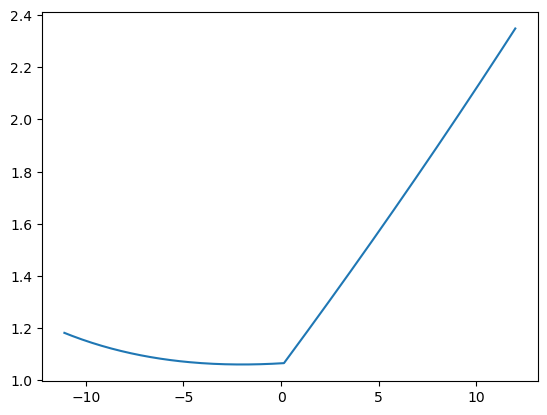

In [15]:
yvals = cell.RB_hist

plt.plot(t, yvals[start:end])